In [38]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from skimage import io, transform
import matplotlib.pyplot as plt
import random
import os

In [39]:
IMAGE_WIDTH=200
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [103]:
# 데이터 불러오기
with_mask = os.listdir("./dataset/with_mask")
without_mask = os.listdir("./dataset/without_mask")

def add_path1(filename):
    return './dataset/with_mask/' + filename
def add_path2(filename):
    return './dataset/without_mask/' + filename

w_mask = list(map(add_path1, with_mask))
wo_mask = list(map(add_path2, without_mask))

In [110]:
# 데이터 preprocessing & label

def dataset(file_list_with, file_list_without,size=(IMAGE_WIDTH,IMAGE_HEIGHT),flattened=False):
    data = []
    labels = []
    for i, file in enumerate(file_list_with):
        if(file =="./dataset/with_mask/.ipynb_checkpoints"):
            continue
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        data.append(image)
        labels.append(1)
    for i, file in enumerate(file_list_without):
        if(file =="./dataset/without_mask/.ipynb_checkpoints"):
            continue
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        data.append(image)
        labels.append(0)
    
    return np.array(data), np.array(labels)

In [112]:
X, y = dataset(w_mask, wo_mask)
print(X.shape,y.shape)

(1237, 200, 150, 3) (1237,)


In [4]:
# 데이터 확인하기
sample_1 = random.choice(with_mask)
sample_0 = random.choice(without_mask)

image1 = load_img("./dataset/with_mask/"+sample_1)
image0 = load_img("./dataset/without_mask/"+sample_0)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(image1)
f.add_subplot(1,2, 2)
plt.imshow(image0)
plt.show(block=True)

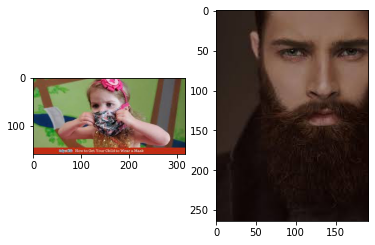

In [5]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization

In [6]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', strides=(2,2), input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
    model.add(Conv2D(64, (3,3), activation='relu',strides=(2,2)))
    model.add(Conv2D(64, (3,3), activation='relu',strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 99, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 49, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 24, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 26112)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1671232   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,727,617
Trainable params: 1,727,617
Non-trainable params: 0
______________________________________________

In [8]:
# preprocessing data

import numpy as np

images = []
labels = []
for index, row in with_mask_df.iterrows():
    if(row['filename'] == '.ipynb_checkpoints'):
        continue
    image = load_img("./dataset/with_mask/" + row['filename'])
    image = np.array(image, dtype = 'float32')
    image = image /255
    images.append(image)
    labels.append(1)
for index, row in without_mask_df.iterrows():
    if(row['filename'] == '.ipynb_checkpoints'):
        continue
    image = load_img("./dataset/without_mask/" + row['filename'])
    image = np.array(image, dtype = 'float32')
    image = image /255
    images.append(image)
    labels.append(0)

df = pd.DataFrame({
    'image': images,
    'label': labels
})

In [22]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=3, stratify=df['label'])
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [23]:
train_df.shape

(989, 2)

In [24]:
validate_df.shape

(248, 2)

In [25]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [26]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [28]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
)

TypeError: All values in column x_col=image must be strings.